Challenge Set 1  
Topic:        Explore MTA turnstile data  
Date:         06/29/2016  
Name:         Avi  
Worked with:  other student's name  

**Challenge 1**

In [2]:
import csv
from datetime import datetime, timedelta
from collections import Counter
import matplotlib.pyplot as plt
import os

In [2]:
# !curl -O http://web.mta.info/developers/data/nyct/turnstile/turnstile_150627.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24.0M    0 24.0M    0     0  1151k      0 --:--:--  0:00:21 --:--:-- 1228k


In [274]:
ls "/home/avi/Documents/metis/ds/Week 1/Turnstile"

turnstile_160604.txt  turnstile_160618.txt  turnstile_160702.txt
turnstile_160611.txt  turnstile_160625.txt


In [3]:
path = "/home/avi/Documents/metis/ds/Week 1/Turnstile/"
all_data = []

for file in os.listdir(path):
    with open(path+file) as f: #'turnstile_150627.txt'
        reader = csv.reader(f)
        rows = [ [ cell.strip() for cell in row ] for row in reader ]
        assert rows.pop(0) == ['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME',
                       'DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES',
                       'EXITS']
        all_data += rows

In [284]:
rows[:2]

[['A002',
  'R051',
  '02-00-00',
  '59 ST',
  'NQR456',
  'BMT',
  '06/04/2016',
  '00:00:00',
  'REGULAR',
  '0005692587',
  '0001927326'],
 ['A002',
  'R051',
  '02-00-00',
  '59 ST',
  'NQR456',
  'BMT',
  '06/04/2016',
  '04:00:00',
  'REGULAR',
  '0005692650',
  '0001927338']]

In [6]:
raw_turnstiles = {}

for row in all_data:
#     print (row[:4], row[4:])
    raw_turnstiles.setdefault( tuple(row[:4]), [] ).append( tuple(row[4:]) )

In [1]:
# list(raw_turnstiles.items())[0]

In [8]:
len(list(raw_turnstiles.values())[0])

216

**Challenge 2**

In [9]:
datetime_count = { turnstile: sorted( [ (
            datetime.strptime(date + time, '%m/%d/%Y%X'), int(entries), int(exits) ) 
        for linename, division, date, time, desc, entries, exits in rows ] )
                  for turnstile, rows in raw_turnstiles.items() }

In [10]:
# list(datetime_count.items())[0]

In [11]:
# Make sure rows are in correct time order
for rows in datetime_count.values():
    assert rows == sorted(rows)

In [12]:
# Columns: Date, Count Entries, Count Exits, Time Difference
datetime_count_delta = { turnstile: [ 
        [ rows[i][0], rows[i+1][1]-rows[i][1], rows[i+1][2]-rows[i][2], rows[i+1][0] - rows[i][0] ] 
        for i in range(len(rows)-1) ]
                         for turnstile, rows in datetime_count.items() }

In [2]:
# list(datetime_count_delta.items())[0]

Run Some Checks Below

In [14]:
all_entries = [ entries for rows in datetime_count_delta.values() for date, entries, exits, delta in rows ]

In [15]:
all_entries.sort()
print(all_entries[-50:])
print(all_entries[:50])

[3255, 3320, 3321, 3355, 3378, 3482, 3566, 3710, 3855, 3901, 3978, 4104, 4334, 4523, 4843, 4892, 5058, 5060, 5084, 5424, 5647, 7108, 7554, 7726, 8272, 10289, 13286, 17720, 154547, 154583, 166450, 261543, 393174, 1291975, 1629370, 2402797, 2557082, 2557829, 49514290, 65989141, 100663186, 116224139, 117416496, 117439681, 134216914, 519992536, 1119107680, 1403818353, 1879007766, 2076115187]
[-1409336682, -552141631, -519992452, -234896738, -151085187, -151057519, -117416496, -50370646, -50331648, -17541186, -16810693, -14151887, -11764812, -11035220, -7229037, -6249543, -5147794, -2886522, -2754015, -2728372, -2557080, -2556224, -2234351, -2130307, -1933256, -1693086, -1629062, -1482085, -1303776, -1153863, -801481, -734467, -557859, -530089, -527759, -515629, -393172, -288267, -281880, -274318, -239146, -183043, -167240, -166391, -154579, -154536, -135440, -123443, -102445, -81727]


In [16]:
time_duration = [ delta.total_seconds() / 3600 
                 for rows in datetime_count_delta.values() 
                 for date, entries, exits, delta in rows ]

In [17]:
print ( Counter(time_duration).most_common(20) )
print ( Counter(all_entries).most_common(20) )

[(4.0, 885429), (4.2, 52631), (8.0, 1031), (4.433333333333334, 779), (0.022222222222222223, 488), (0.0225, 377), (0.02277777777777778, 114), (0.021944444444444444, 92), (0.023055555555555555, 81), (4.199722222222222, 75), (0.017222222222222222, 70), (1.0, 65), (0.019166666666666665, 59), (0.023333333333333334, 58), (12.0, 48), (0.8347222222222223, 47), (0.025833333333333333, 43), (0.017777777777777778, 42), (0.0002777777777777778, 42), (0.02361111111111111, 41)]
[(0, 135718), (1, 15635), (2, 11097), (3, 9535), (4, 8878), (5, 8610), (6, 8178), (7, 7812), (8, 7641), (9, 7298), (10, 6923), (11, 6840), (12, 6662), (13, 6455), (14, 6358), (15, 6136), (16, 5904), (17, 5630), (18, 5507), (19, 5426)]


Answer to Challenge 2:

In [18]:
datetime_final_counts = { turnstile: 
        [ (date, entries, exits) for date, entries, exits, delta in rows if 0 <= entries <= 5000 ] 
        for turnstile, rows in datetime_count_delta.items() }

In [3]:
# list(datetime_final_counts.items())[:5]

In [20]:
all_good_counts = [ entries for row in datetime_final_counts.values() for date, entries, exits in row ]

In [4]:
# list(datetime_final_counts.items())[0]

In [327]:
# all_good_counts[-100:]

In [22]:
print ( 'Percentage Used: {}%'.format(len(all_good_counts) / len(all_entries) * 100) )

Percentage Used: 99.23755761561965%


**Challenge 3**

Most Common Time Deltas Between Measurements

In [23]:
print ( Counter(time_duration).most_common(10) )

[(4.0, 885429), (4.2, 52631), (8.0, 1031), (4.433333333333334, 779), (0.022222222222222223, 488), (0.0225, 377), (0.02277777777777778, 114), (0.021944444444444444, 92), (0.023055555555555555, 81), (4.199722222222222, 75)]


In [330]:
# Problem is this does not group by day, rather sums up whole turnstile entries
#
# turnstile_count = { turnstile: sum( [ entries for date, entries, exits in row ] ) 
#                    for turnstile, row in datetime_final_counts.items() }

In [331]:
# list(turnstile_count.items())[0]

In [24]:
day_count = {}
for turnstile, row in datetime_final_counts.items():
    each_day = {}
    for date, entries, exits in row:
        day = date.date()
        each_day[day] = each_day.get(day, 0) + entries
    day_count[turnstile] = sorted(each_day.items())

In [5]:
# list(day_count.items())[0]

Day_count variable is answer to challenge 3.

In [334]:
# len(day_count.keys())

**Challenge 4**

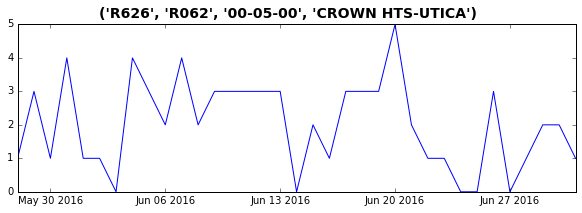

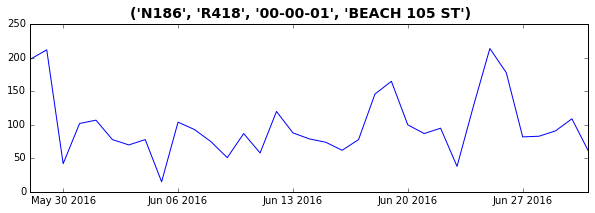

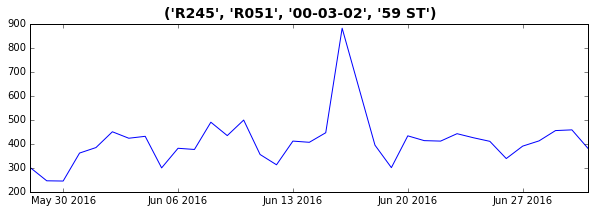

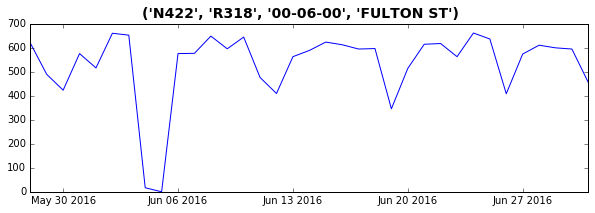

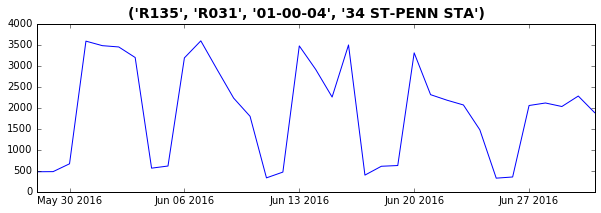

In [26]:
%matplotlib inline

graphs_to_make = 5
for i in range(graphs_to_make):
    dates = [ date for date, entries in list(day_count.values())[i] ]
    counts = [ entries for date, entries in list(day_count.values())[i] ]
#     print ( list(day_count.keys())[i] )
    plt.figure(figsize=(10,3)).suptitle(list(day_count.keys())[i], fontsize=14, fontweight='bold')
    plt.plot(dates, counts)

**Challenge 5**

In [27]:
day_count_unit = {}

for turnstile, row in day_count.items():
    day_count_unit.setdefault( (turnstile[0], turnstile[1], turnstile[3]), {} )

    for day in range(len(row)):
        day_count_unit[ (turnstile[0], turnstile[1], turnstile[3]) ].setdefault( row[day][0], 0) 
        day_count_unit[ (turnstile[0], turnstile[1], turnstile[3]) ][row[day][0]] += row[day][1]
    
list(day_count_unit.items())[:5]

[(('N523', 'R300', '2 AV'),
  {datetime.date(2016, 5, 28): 6735,
   datetime.date(2016, 5, 29): 5687,
   datetime.date(2016, 5, 30): 4281,
   datetime.date(2016, 5, 31): 10453,
   datetime.date(2016, 6, 1): 11099,
   datetime.date(2016, 6, 2): 11686,
   datetime.date(2016, 6, 3): 11805,
   datetime.date(2016, 6, 4): 8521,
   datetime.date(2016, 6, 5): 6935,
   datetime.date(2016, 6, 6): 10837,
   datetime.date(2016, 6, 7): 11465,
   datetime.date(2016, 6, 8): 12182,
   datetime.date(2016, 6, 9): 12037,
   datetime.date(2016, 6, 10): 12329,
   datetime.date(2016, 6, 11): 8647,
   datetime.date(2016, 6, 12): 7762,
   datetime.date(2016, 6, 13): 10499,
   datetime.date(2016, 6, 14): 11068,
   datetime.date(2016, 6, 15): 11817,
   datetime.date(2016, 6, 16): 12018,
   datetime.date(2016, 6, 17): 12201,
   datetime.date(2016, 6, 18): 9104,
   datetime.date(2016, 6, 19): 7297,
   datetime.date(2016, 6, 20): 10135,
   datetime.date(2016, 6, 21): 10812,
   datetime.date(2016, 6, 22): 11564,
  

**Challenge 6**

In [28]:
day_count_station = {}

for turnstile, row in day_count_unit.items():
    day_count_station.setdefault( (turnstile[1], turnstile[2]), {} )
    
    for x, y in row.items():
        day_count_station[ (turnstile[1], turnstile[2]) ].setdefault( x, 0) 
        day_count_station[ (turnstile[1], turnstile[2]) ][x] += y

list(day_count_station.items())[:5]

[(('R033', 'TIMES SQ-42 ST'),
  {datetime.date(2016, 5, 28): 50085,
   datetime.date(2016, 5, 29): 47427,
   datetime.date(2016, 5, 30): 35856,
   datetime.date(2016, 5, 31): 55492,
   datetime.date(2016, 6, 1): 60683,
   datetime.date(2016, 6, 2): 61607,
   datetime.date(2016, 6, 3): 59906,
   datetime.date(2016, 6, 4): 49081,
   datetime.date(2016, 6, 5): 39251,
   datetime.date(2016, 6, 6): 58767,
   datetime.date(2016, 6, 7): 60229,
   datetime.date(2016, 6, 8): 61840,
   datetime.date(2016, 6, 9): 64025,
   datetime.date(2016, 6, 10): 63407,
   datetime.date(2016, 6, 11): 48232,
   datetime.date(2016, 6, 12): 42302,
   datetime.date(2016, 6, 13): 55818,
   datetime.date(2016, 6, 14): 61734,
   datetime.date(2016, 6, 15): 62292,
   datetime.date(2016, 6, 16): 62861,
   datetime.date(2016, 6, 17): 64622,
   datetime.date(2016, 6, 18): 50497,
   datetime.date(2016, 6, 19): 42184,
   datetime.date(2016, 6, 20): 58010,
   datetime.date(2016, 6, 21): 60754,
   datetime.date(2016, 6, 22)

**Challenge 7**

In [29]:
day_count_station2 = {}
for turnstile, row in day_count_station.items():
    day_count_station2[turnstile] = sorted([ (x,y) for x,y in row.items() ], key=lambda x: x[0])

list(day_count_station2.items())[:3]

[(('R033', 'TIMES SQ-42 ST'),
  [(datetime.date(2016, 5, 28), 50085),
   (datetime.date(2016, 5, 29), 47427),
   (datetime.date(2016, 5, 30), 35856),
   (datetime.date(2016, 5, 31), 55492),
   (datetime.date(2016, 6, 1), 60683),
   (datetime.date(2016, 6, 2), 61607),
   (datetime.date(2016, 6, 3), 59906),
   (datetime.date(2016, 6, 4), 49081),
   (datetime.date(2016, 6, 5), 39251),
   (datetime.date(2016, 6, 6), 58767),
   (datetime.date(2016, 6, 7), 60229),
   (datetime.date(2016, 6, 8), 61840),
   (datetime.date(2016, 6, 9), 64025),
   (datetime.date(2016, 6, 10), 63407),
   (datetime.date(2016, 6, 11), 48232),
   (datetime.date(2016, 6, 12), 42302),
   (datetime.date(2016, 6, 13), 55818),
   (datetime.date(2016, 6, 14), 61734),
   (datetime.date(2016, 6, 15), 62292),
   (datetime.date(2016, 6, 16), 62861),
   (datetime.date(2016, 6, 17), 64622),
   (datetime.date(2016, 6, 18), 50497),
   (datetime.date(2016, 6, 19), 42184),
   (datetime.date(2016, 6, 20), 58010),
   (datetime.date(2

In [191]:
# for each in list(new_station_dict.values())[0]:
#     print (each[0])

2015-06-20
2015-06-21
2015-06-22
2015-06-23
2015-06-24
2015-06-25


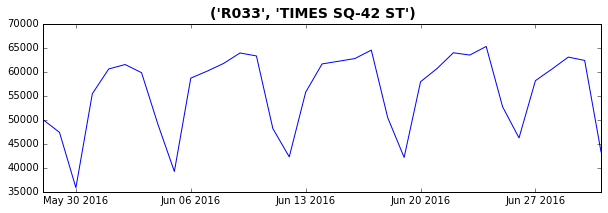

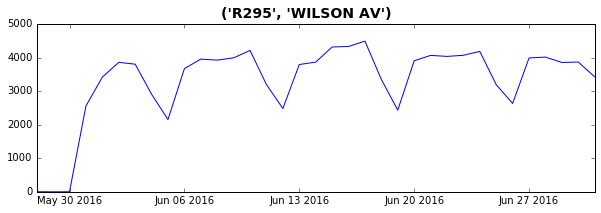

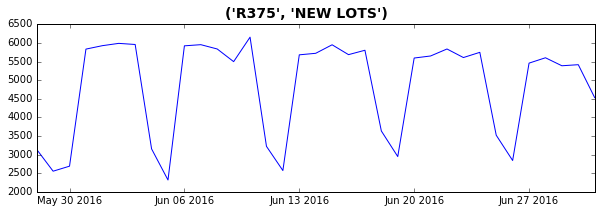

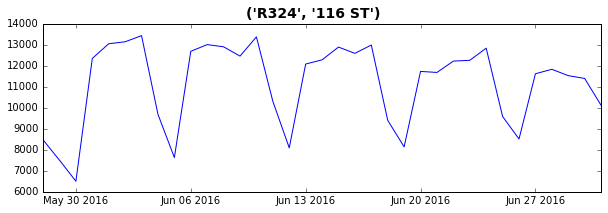

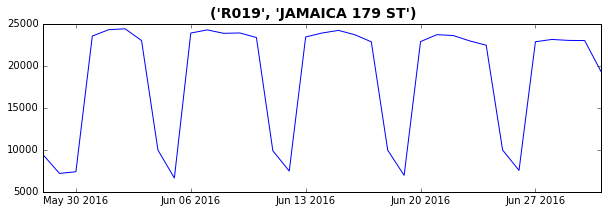

In [30]:
%matplotlib inline

graphs_to_make = 5
for i in range(graphs_to_make):
    dates, counts = [], []
    for station in list(day_count_station2.values())[i]:
        dates.append(station[0])
        counts.append(station[1])
    plt.figure(figsize=(10,3)).suptitle(list(day_count_station2.keys())[i], fontsize=14, fontweight='bold')
    plt.plot(dates, counts)

**Challenge 8**

In [31]:
# for turnstile, row in day_count_station2.items():
#     for x,y in row:
#         print (x-timedelta(days=x.weekday()), y)
# #     print (row[0], row[0][0].weekday())
#     break

In [32]:
week_count_station = {}

for turnstile, row in day_count_station2.items():
    week_count_station.setdefault( turnstile, {} )
    for x, y in row:
        week_days = [0]*7
#         print(week_num, week_count_station[ turnstile ])
        week_count_station[ turnstile ].setdefault( x - timedelta(days=x.weekday()) , week_days )
        week_count_station[ turnstile ][ x-timedelta(days=x.weekday()) ][x.weekday()] += y
        
list(week_count_station.items())[:5]

[(('R033', 'TIMES SQ-42 ST'),
  {datetime.date(2016, 5, 23): [0, 0, 0, 0, 0, 50085, 47427],
   datetime.date(2016, 5, 30): [35856,
    55492,
    60683,
    61607,
    59906,
    49081,
    39251],
   datetime.date(2016, 6, 6): [58767,
    60229,
    61840,
    64025,
    63407,
    48232,
    42302],
   datetime.date(2016, 6, 13): [55818,
    61734,
    62292,
    62861,
    64622,
    50497,
    42184],
   datetime.date(2016, 6, 20): [58010,
    60754,
    64070,
    63587,
    65390,
    52772,
    46265],
   datetime.date(2016, 6, 27): [58236, 60643, 63161, 62469, 43308, 0, 0]}),
 (('R295', 'WILSON AV'),
  {datetime.date(2016, 5, 23): [0, 0, 0, 0, 0, 3, 0],
   datetime.date(2016, 5, 30): [1, 2564, 3425, 3866, 3812, 2914, 2158],
   datetime.date(2016, 6, 6): [3680, 3963, 3933, 4001, 4222, 3201, 2488],
   datetime.date(2016, 6, 13): [3802, 3873, 4325, 4340, 4501, 3357, 2439],
   datetime.date(2016, 6, 20): [3913, 4074, 4044, 4078, 4192, 3198, 2640],
   datetime.date(2016, 6, 27): [39

In [341]:
## Old week_count_station 
# week_count_station = {}
# week_days = [0]*7

# for turnstile, row in day_count_station2.items():
#     week_count_station.setdefault( turnstile, week_days )
#     for x, y in row:
#         week_count_station[ turnstile ][x.weekday()] += y
        
# list(week_count_station.items())[:5]

[(('R122', '90 ST-ELMHURST'),
  [25839968, 29981437, 30408926, 30185905, 28668712, 17146363, 13809377]),
 (('R166', '79 ST'),
  [25839968, 29981437, 30408926, 30185905, 28668712, 17146363, 13809377]),
 (('R324', '116 ST'),
  [25839968, 29981437, 30408926, 30185905, 28668712, 17146363, 13809377]),
 (('R239', 'GREENPOINT AV'),
  [25839968, 29981437, 30408926, 30185905, 28668712, 17146363, 13809377]),
 (('R550', 'CITY / BUS'),
  [25839968, 29981437, 30408926, 30185905, 28668712, 17146363, 13809377])]

In [33]:
list(list(week_count_station.values())[0])

[datetime.date(2016, 6, 27),
 datetime.date(2016, 5, 30),
 datetime.date(2016, 6, 13),
 datetime.date(2016, 5, 23),
 datetime.date(2016, 6, 6),
 datetime.date(2016, 6, 20)]

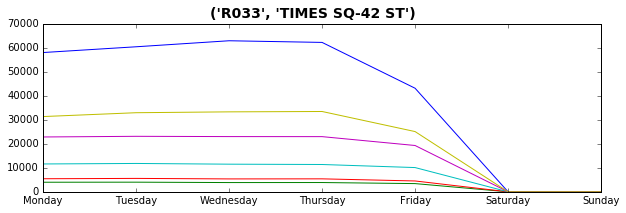

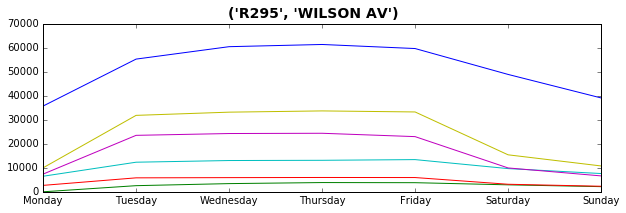

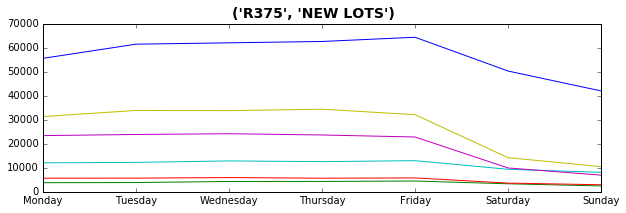

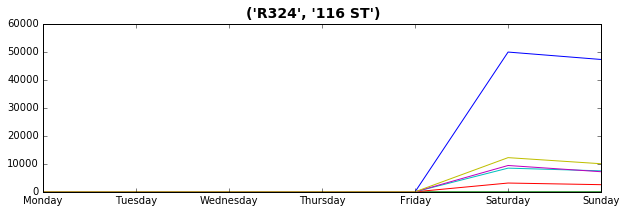

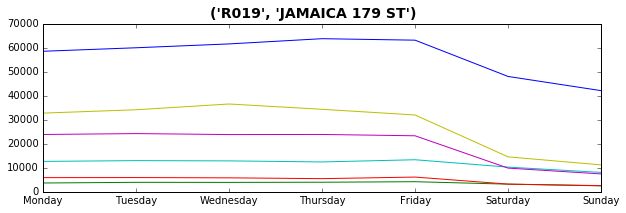

In [34]:
%matplotlib inline
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

graphs_to_make = 5
for i in range(graphs_to_make):
#     dates, counts = [], []
#     for station in list(week_count_station.values())[i]:
#         dates.append(station[0])
#         counts.append(station[1])
    fig = plt.figure(figsize=(10,3))
    fig.suptitle(list(week_count_station.keys())[i], fontsize=14, fontweight='bold')
    fig.add_subplot(111).set_xticklabels(days)
    for week in range(len(list(list(week_count_station.values())[0]))):
        plt.plot(list(list(week_count_station.values())[week].values())[i])

**Challenge 9**

In [35]:
week_single_count_station = {}

for turnstile, row in day_count_station2.items():
    week_single_count_station.setdefault( turnstile, 0 )
    for x, y in row:
        week_days = [0]*7
        week_single_count_station[ turnstile ] += y
single_count_station = sorted(week_single_count_station.items(), key=lambda x: x[1], reverse=True)
# list(list(week_single_count_station.items())[0])[1]

In [36]:
single_count_station[:20]

[(('R170', '14 ST-UNION SQ'), 3333708),
 (('R022', '34 ST-HERALD SQ'), 2289668),
 (('R084', '59 ST COLUMBUS'), 2210647),
 (('R046', 'GRD CNTRL-42 ST'), 2181521),
 (('R179', '86 ST'), 1978501),
 (('R033', 'TIMES SQ-42 ST'), 1956863),
 (('R012', '34 ST-PENN STA'), 1924337),
 (('R055', 'FLUSHING-MAIN'), 1888823),
 (('R020', '47-50 STS ROCK'), 1709174),
 (('R293', '34 ST-PENN STA'), 1695860),
 (('R011', '42 ST-PORT AUTH'), 1687757),
 (('R018', 'JKSN HT-ROOSVLT'), 1556164),
 (('R014', 'FULTON ST'), 1501110),
 (('R023', '34 ST-HERALD SQ'), 1412682),
 (('R138', 'W 4 ST-WASH SQ'), 1370024),
 (('R057', 'ATL AV-BARCLAY'), 1356879),
 (('R452', '72 ST'), 1315223),
 (('R021', '42 ST-BRYANT PK'), 1278666),
 (('R047', 'GRD CNTRL-42 ST'), 1250234),
 (('R168', '96 ST'), 1240269)]

**Challenge 10**

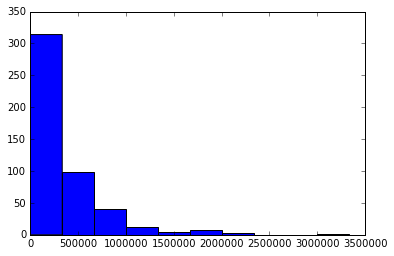

In [38]:
%matplotlib inline

plt.hist([ x[1] for x in single_count_station ])
plt.show()

**Additional**

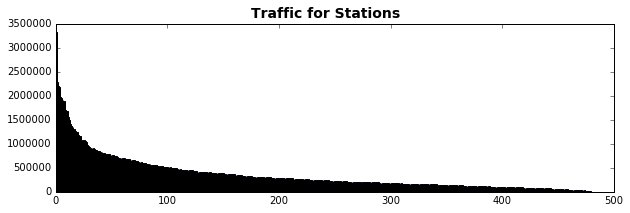

In [49]:
%matplotlib inline

fig = plt.figure(figsize=(10,3))
fig.suptitle("Traffic for Stations", fontsize=14, fontweight='bold')
indices = range(len(single_count_station))
traffic = [ x[1] for x in single_count_station ]
plt.bar( range(len(traffic)), traffic )
plt.show()

In [48]:
len([ x[1] for x in single_count_station if x[1] <= 0 ])

0